<a href="https://colab.research.google.com/github/JaehahShin/ROB-310-Project---Bayesian-Tracking-WIth-Prime-Number/blob/main/Bayesian_Tracking_and_Robot_Simulation_for_Prime_Localization_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivation of This Assignments
##### Prime numbers are inherently unpredictable, a characteristic that makes them crucial in modern cryptography. As robotics continues to evolve and integrate with critical and sensitive systems, cryptography plays an increasingly important role in ensuring security.
---

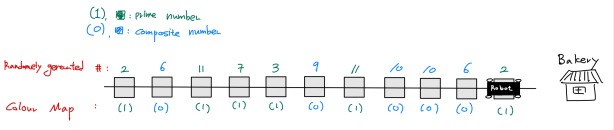

---
## Scenario
A robot designed to transport humans to their desired locations is programmed to deliver its passenger to a point **50 meters beyond the last station**. This is because the **best bakery in the world** is located at that spot! 🍞  

To achieve this, we will use **Bayesian localization** to enable the robot to accurately:  
1. Determine its position along the path.  
2. Identify the last station.  
3. Ensure it stops precisely **50 meters** beyond the final station.  

---

## Assignment Setup

We are working with a series of **21 stations**, each identified by a unique address. The addresses are represented as follows:  
`addresses = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21
]
`  
For simplicity, assume the robot always starts at `addresses[0] = 1` and follows the path sequentially.  

Each station is associated with a randomly generated number. There are two types:
- **Prime numbers** are represented as **1** and displayed in **green**.  
- **Composite numbers** are represented as **0** and displayed in **blue**.  

One important note:  
- The **last station** is always programmed to be a prime number for simplicity.  

---

## Goal of the Assignment

The goal is to determine if a robot can successfully:  
1. **Localize** its position along the path, identifying where the robot is at each step -> In Question 1
2. **Stop** 50 meters after passing the **last station**.  -> In Question 2

# Question 1: Identifying Prime Number Stations Using Bayesian Tracking in a Range

In [ ]:
# This is a library of functions students can use to do this project.
# Make sure students have this installed on their computer. (or use google colab so that they don't need to have it on their local computer)
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import scipy as sp
import numpy as np
from scipy.interpolate import interp1d
import random
import math
import sympy

## Probalibistic Models

In [ ]:
# This is initial colour of topological map of what robot can go.
# As shown below, we use prime and composite numbers to represent the colours.
# This part is given as this is not the main part of the project.
from sympy import *

NOTHING = -1
BLUE = 0 # non-prime
GREEN = 1 # prime

code2color = {-1: 'nothing', 0: 'blue', 1: 'green'}

addresses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21]

# Generate a list of random numbers between 2 and 11
random_number = [random.randint(2, 11) for _ in range(20)]

# Ensure the last element is a prime number
while True:
    last_num = random.randint(2, 11)
    if isprime(last_num):
        random_number.append(last_num)
        break
print("Random Numbers:", random_number)

# Generate the initial colors list with default colors (BLUE)
colors = [BLUE if not isprime(num) else GREEN for num in random_number]

print("Colors:", colors)



Random Numbers: [7, 3, 8, 4, 3, 7, 11, 7, 11, 10, 2, 9, 9, 2, 7, 2, 6, 9, 4, 4, 2]
Colors: [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]


In [ ]:
# verify correct inputs
for i in range(len(addresses)):
    print(f"Address {addresses[i]} is color {code2color[colors[i]]}")

Address 1 is color green
Address 2 is color green
Address 3 is color blue
Address 4 is color blue
Address 5 is color green
Address 6 is color green
Address 7 is color green
Address 8 is color green
Address 9 is color green
Address 10 is color blue
Address 11 is color green
Address 12 is color blue
Address 13 is color blue
Address 14 is color green
Address 15 is color green
Address 16 is color green
Address 17 is color blue
Address 18 is color blue
Address 19 is color blue
Address 20 is color blue
Address 21 is color green


In [ ]:
def dynamic_pred(x_k, u_k):
    '''dynamics probability of P(x_k_1 | x_k, u_k) return in form of a state vector'''
    # x_k_1 is an address
    # x_k is an address
    # u_k is -1, 0, 1

    '''
    xk+1 |uk =  -1      0        +1
    X - χ       0.85    0.05    0.05
    X           0.10    0.90    0.10
    X + χ       0.05    0.05    0.85
    '''

    u_k_index = u_k + 1

    bwd = [0.85, 0.05, 0.05]
    stay = [0.10, 0.90, 0.10]
    fwd = [0.05, 0.05, 0.85]

    x_k_1 = np.zeros(21)

    x_k_index = addresses.index(x_k)

    if x_k_index + 1 >= len(addresses):
        x_k_1[0] = fwd[u_k_index]
    else:
        x_k_1[x_k_index + 1] = fwd[u_k_index]

    if x_k_index - 1 < 0:
        x_k_1[-1] = bwd[u_k_index]
    else:
        x_k_1[x_k_index - 1] = bwd[u_k_index]

    x_k_1[x_k_index] = stay[u_k_index]

    return x_k_1

In [ ]:
for x_k in addresses:
    for u_k in [-1, 0, 1]:  # All possible controls
        dynamics = dynamic_pred(x_k, u_k)
        print(f"x_k={x_k}, u_k={u_k}, dynamics sum={np.sum(dynamics)}")


x_k=1, u_k=-1, dynamics sum=1.0
x_k=1, u_k=0, dynamics sum=1.0
x_k=1, u_k=1, dynamics sum=1.0
x_k=2, u_k=-1, dynamics sum=1.0
x_k=2, u_k=0, dynamics sum=1.0
x_k=2, u_k=1, dynamics sum=1.0
x_k=3, u_k=-1, dynamics sum=1.0
x_k=3, u_k=0, dynamics sum=1.0
x_k=3, u_k=1, dynamics sum=1.0
x_k=4, u_k=-1, dynamics sum=1.0
x_k=4, u_k=0, dynamics sum=1.0
x_k=4, u_k=1, dynamics sum=1.0
x_k=5, u_k=-1, dynamics sum=1.0
x_k=5, u_k=0, dynamics sum=1.0
x_k=5, u_k=1, dynamics sum=1.0
x_k=6, u_k=-1, dynamics sum=1.0
x_k=6, u_k=0, dynamics sum=1.0
x_k=6, u_k=1, dynamics sum=1.0
x_k=7, u_k=-1, dynamics sum=1.0
x_k=7, u_k=0, dynamics sum=1.0
x_k=7, u_k=1, dynamics sum=1.0
x_k=8, u_k=-1, dynamics sum=1.0
x_k=8, u_k=0, dynamics sum=1.0
x_k=8, u_k=1, dynamics sum=1.0
x_k=9, u_k=-1, dynamics sum=1.0
x_k=9, u_k=0, dynamics sum=1.0
x_k=9, u_k=1, dynamics sum=1.0
x_k=10, u_k=-1, dynamics sum=1.0
x_k=10, u_k=0, dynamics sum=1.0
x_k=10, u_k=1, dynamics sum=1.0
x_k=11, u_k=-1, dynamics sum=1.0
x_k=11, u_k=0, dynamics 

In [ ]:
import random

def miller_rabin_with_confidence(n, k=5):
    n = int(n)
    if n <= 1:
        return False, 0  # Randomized confidence for trivial cases
    if n <= 3:
        return True, random.uniform(0.9, 1.0)    #
    if n % 2 == 0:
        return False, random.uniform(0.1, 0.2)  # Randomized confidence for even numbers

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Perform k iterations
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            # Composite detected
            confidence1 = random.uniform(0.1, 0.2)  # Randomized confidence for composites
            return False, confidence1

    # If no evidence of compositeness was found, n is probably prime
    confidence2 = 1 - 4**-k
    return True, confidence2


confidences = []

for number in random_number:
    k_iterations = 2

    # Apply Miller-Rabin test for primality
    is_probably_prime, confidence = miller_rabin_with_confidence(number, k_iterations)
    confidences.append(confidence)

    # Output result
    print(f"Result: {number} is {'probably prime' if is_probably_prime else 'composite'} with confidence {confidence:.5f}")

print("Confidences:", confidences)



Result: 7 is probably prime with confidence 0.93750
Result: 3 is probably prime with confidence 0.93258
Result: 8 is composite with confidence 0.13288
Result: 4 is composite with confidence 0.12328
Result: 3 is probably prime with confidence 0.96120
Result: 7 is probably prime with confidence 0.93750
Result: 11 is probably prime with confidence 0.93750
Result: 7 is probably prime with confidence 0.93750
Result: 11 is probably prime with confidence 0.93750
Result: 10 is composite with confidence 0.15797
Result: 2 is probably prime with confidence 0.95271
Result: 9 is composite with confidence 0.17757
Result: 9 is composite with confidence 0.14031
Result: 2 is probably prime with confidence 0.90360
Result: 7 is probably prime with confidence 0.93750
Result: 2 is probably prime with confidence 0.97294
Result: 6 is composite with confidence 0.14338
Result: 9 is composite with confidence 0.17754
Result: 4 is composite with confidence 0.15313
Result: 4 is composite with confidence 0.18749
Re

In [ ]:
possible_observations = ['blue', 'green', 'nothing']  # Observed states (z_k)

def measurement_model(z_k, x_k, confidence):
    '''Measurement probability of P(z_k | x_k) returned in the form of a state vector'''
    # x_k is an address (representing the state)
    # z_k is a color (observation)

    color_of_x_k = colors[addresses.index(x_k)]  # Lookup the color based on the address

    # Dynamically generate measurement probabilities based on confidence from Miller-Rabin
    if confidence > 0.9:  # High confidence (likely prime) -> (GREEN)
        #           | blue green nothing
        blue_meas = [0.90, 0.05, 0.05]  # More confidence in the 'blue' state
        green_meas = [0.05, 0.9, 0.05]  # More confidence in the 'green' state
    elif confidence < 0.5:  # Low confidence (likely composite) -> (B:UE)
        blue_meas = [0.5, 0.4, 0.1]
        green_meas = [0.4, 0.5, 0.1]  # More spread out, less trust in measurements

    # Measurement probabilities matrix
    measures = [blue_meas, green_meas]

    return measures[color_of_x_k][z_k]

# Iterate through the confidences list and compute probabilities for each observation (z_k)
for i, confidence in enumerate(confidences):
    x_k = addresses[i]  # State corresponds to the current address
    print(f"Address: {x_k}, Confidence: {confidence:.5f}")

    for observed_color in possible_observations:  # Dynamically loop through possible observations
        z_k = possible_observations.index(observed_color)  # Convert observed color to index
        probability = measurement_model(z_k, x_k, confidence)
        print(f"  Observed Color: {observed_color}, Measurement Probability: {probability:.5f}")

Address: 1, Confidence: 0.93750
  Observed Color: blue, Measurement Probability: 0.05000
  Observed Color: green, Measurement Probability: 0.90000
  Observed Color: nothing, Measurement Probability: 0.05000
Address: 2, Confidence: 0.93258
  Observed Color: blue, Measurement Probability: 0.05000
  Observed Color: green, Measurement Probability: 0.90000
  Observed Color: nothing, Measurement Probability: 0.05000
Address: 3, Confidence: 0.13288
  Observed Color: blue, Measurement Probability: 0.50000
  Observed Color: green, Measurement Probability: 0.40000
  Observed Color: nothing, Measurement Probability: 0.10000
Address: 4, Confidence: 0.12328
  Observed Color: blue, Measurement Probability: 0.50000
  Observed Color: green, Measurement Probability: 0.40000
  Observed Color: nothing, Measurement Probability: 0.10000
Address: 5, Confidence: 0.96120
  Observed Color: blue, Measurement Probability: 0.05000
  Observed Color: green, Measurement Probability: 0.90000
  Observed Color: nothing

## Bayesian Model

In [ ]:
def state_predictions(x_k, u_k):
    '''return probability of P(x_k_1 | x_k, u_k) in form of a vector'''
    # P(x_k_1 | x_k, u_k) = Σ P(x_k_1 | x_k, u_k) # sum over all beliefs in x_k

    x_k_1 = np.zeros(21)

    for i in range(len(x_k)):
        # i is the index of address we are looking at for x_k_1

        for j in range(len(x_k)):
            # j is the index of the address we are summing over for x_k belief

            x_k_1[i] += x_k[j]*dynamic_pred(addresses[j], u_k)[i]

    return x_k_1

In [ ]:
def bayes_step(x_k, u_k, z_k_1):
    '''return probability of P(x_k+1 | x_k, u_k, z_k_1) in form of a vector'''

    x_k_1 = np.zeros(21)

    dynamics = state_predictions(x_k, u_k)

    for i in range(len(x_k)):
        x_k_1[i] = dynamics[i] * measurement_model(z_k_1, addresses[i], confidence)

    return x_k_1 / np.sum(x_k_1) #normalize



## Demonstration


In [ ]:
beliefs = [1/21 * np.ones(21)]

controls = 21*[1]
'''Randomized Noise Model'''
def generate_measurements(colors1):
    """Generate measurements based on colors1 with slight variations, iterating over colors1 twice."""
    measurements = []

    for _ in range(1):  # Iterate over colors once
        for color in colors:
            if color == GREEN:
                measurements.append(random.choices([GREEN, NOTHING, BLUE], weights=[90, 5, 5])[0])
            elif color == BLUE:
                measurements.append(random.choices([BLUE, NOTHING, GREEN], weights=[90, 5, 5])[0])
    return measurements
measurements = generate_measurements(colors)
print(f"Measurements: {measurements}")



Measurements: [1, -1, 1, -1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, -1, 1]


In [ ]:
for i in range(len(controls)):
    beliefs.append(bayes_step(beliefs[-1], controls[i], measurements[i]))



In [ ]:
for i, (control, measurement) in enumerate(zip(controls, measurements)):
    print(f"Step {i}: Control={control}, Measurement={code2color[measurement]}, Beliefs={beliefs[i]}")

Step 0: Control=1, Measurement=green, Beliefs=[0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905]
Step 1: Control=1, Measurement=nothing, Beliefs=[0.08       0.08       0.00444444 0.00444444 0.08       0.08
 0.08       0.08       0.08       0.00444444 0.08       0.00444444
 0.00444444 0.08       0.08       0.08       0.00444444 0.00444444
 0.00444444 0.00444444 0.08      ]
Step 2: Control=1, Measurement=green, Beliefs=[0.08       0.07622222 0.06866667 0.00822222 0.01577778 0.08
 0.08       0.08       0.07622222 0.07244444 0.012      0.06866667
 0.00822222 0.01577778 0.08       0.07622222 0.06866667 0.00444444
 0.00444444 0.00822222 0.01577778]
Step 3: Control=1, Measurement=nothing, Beliefs=[0.04200644 0.13166336 0.00666798 0.00554946 0.0209292  0.04232103
 0.13323628 0.1329217  0.13197794 0.00672041 0.11

## Plot Changes in belief over time as animation

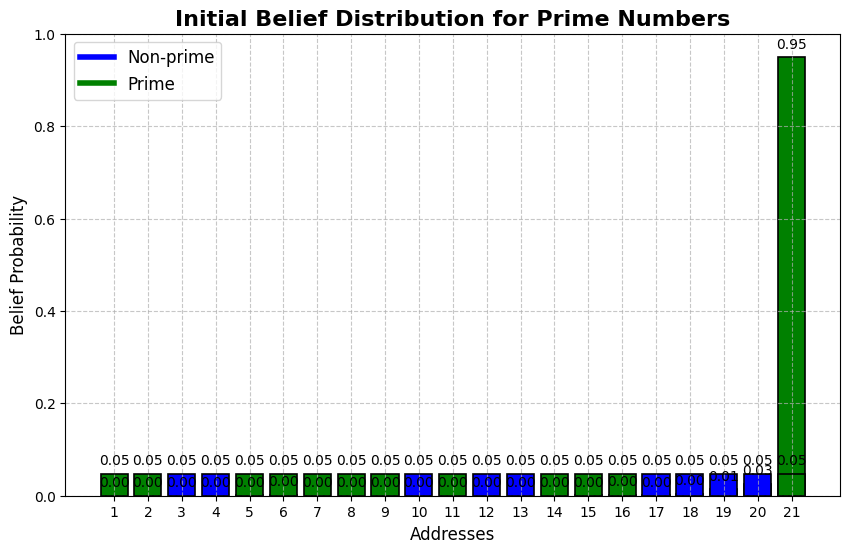

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10, 6))

# Update initialization function
def init():
    bars = ax.bar(addresses, beliefs[0], color=[code2color[color] for color in colors], edgecolor='black', linewidth=1.2)
    ax.set_title('Initial Belief Distribution for Prime Numbers', fontsize=16, fontweight='bold')
    ax.set_xlabel('Addresses', fontsize=12)
    ax.set_ylabel('Belief Probability', fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_xticks(addresses)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Move legend to the upper-left corner inside the plot
    ax.legend(handles=[Line2D([0], [0], color='blue', lw=4, label='Non-prime'),
                       Line2D([0], [0], color='green', lw=4, label='Prime')],
              loc='upper left', fontsize=12)

    # Add value annotations on the bars
    for i, rect in enumerate(bars):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

    return bars

# Update function for animation
def update(frame):
    ax.clear()
    bars = ax.bar(addresses, beliefs[frame], color=[code2color[color] for color in colors], edgecolor='black', linewidth=1.2)
    ax.set_title(f'Belief Distribution at Step {frame} for Prime Numbers', fontsize=16, fontweight='bold')
    ax.set_xlabel('Addresses', fontsize=12)
    ax.set_ylabel('Belief Probability', fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_xticks(addresses)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Move legend to the upper-left corner inside the plot
    ax.legend(handles=[Line2D([0], [0], color='blue', lw=4, label='Non-prime'),
                       Line2D([0], [0], color='green', lw=4, label='Prime')],
              loc='upper left', fontsize=12)

    # Add value annotations on the bars
    for i, rect in enumerate(bars):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

    return bars

# Create animation
ani = FuncAnimation(fig, update, frames=range(len(beliefs)), init_func=init, interval=2000, repeat=False)

# Display the animation
HTML(ani.to_jshtml())


In [ ]:
# save animation to file
ani.save('bayes_filter.gif', writer='imagemagick')

# Question 2: Simulate the robot stopping after passing the final station which is a prime number.

---
## Problem Setup

The following parameters define the system and initial conditions for the robot’s journey:  

- **Mass of the car**: \( m = 2000 \, $\text{kg}$ \)  
- **Sampling period**: \( T = 0.1 \, $\text{s}$ \) (time interval for the car's computer to process measurements and actions)  
- **Measurement-to-action function**: \( $\text{fcn}(\ldots)$ \), a function mapping measurements to the car’s actions  
- **Initial position**: \( d(0) = 0 \, $\text{m}$ \)  
- **Initial velocity**: \( \dot{d}(0) = 130 \, $\text{km/h}$ \)  
- **Last station location**: \( 150 \, $\text{m}$ \) from the initial position  
- **Final halt location**: \( 200 \, $\text{m}$ \) from the initial position  

---


## 2.a) Find A, B, C, and D based on the state-space equation

Let the **state vector** $\mathbf{x}$ be defined as:

$$
\mathbf{x} = \begin{bmatrix}
d \\
\dot{d} \\
D
\end{bmatrix}
$$

where:
- $\mathbf{d}$: Distance between the robot and the last station of prime number (changes over time).
- $\dot{d}$: Rate of change of $d$ (relative velocity of the robot).
- $D$: A constant representing the initial reference distance to the last station of prime number (unchanging).

The **control input** $\mathbf{u}$ represents the robot's acceleration (positive for speeding up, negative for braking).

The **output vector** $\mathbf{y}$ is defined as:

$$
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
= \begin{bmatrix}
D - d \\
\dot{d}
\end{bmatrix}
$$

where:
- $y_1$: The remaining distance to the last station of prime number.
- $y_2$: The relative velocity of the robot.

Using the state-space model of the system:

$$
\dot{\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}
$$

$$
\mathbf{y} = \mathbf{C} \mathbf{x} + \mathbf{D} \mathbf{u}
$$


In [ ]:
import sympy as sp

# Define symbols
d, ddot, D = sp.symbols('d ddot D')  # States


u = sp.symbols('u')  # Input
y1, y2 = sp.symbols('y1 y2')  # Outputs

# Define state vector and its derivative
x = sp.Matrix([d, ddot, D])
x_dot = sp.Matrix([ddot, u, 0])  # Dynamics of the system

# Control input
B_matrix = sp.Matrix([0, 1, 0])  # Influence of u on the state

# Output equations
y = sp.Matrix([D - d, ddot])  # Output vector

# Solve for A, B, C, D
# A matrix is derived from x_dot = Ax + Bu
A_matrix= x_dot.jacobian(x)

# C matrix is derived from y = Cx + Du
C_matrix = y.jacobian(x)

# D matrix is derived from y = Cx + Du
D_matrix = y.jacobian(sp.Matrix([u]))

print("A matrix:")
sp.pprint(A_matrix)

print("\nB matrix:")
sp.pprint(B_matrix)

print("\nC matrix:")
sp.pprint(C_matrix)

print("\nD matrix:")
sp.pprint(D_matrix)


A matrix:
⎡0  1  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

B matrix:
⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

C matrix:
⎡-1  0  1⎤
⎢        ⎥
⎣0   1  0⎦

D matrix:
⎡0⎤
⎢ ⎥
⎣0⎦


### 2.b) Compute A_d and B_d using **cont2discrete**  within **scipy**. Make sure to use the **zero-order hold** ~ **zoh** for the discretization method.

In [ ]:
from scipy.signal import cont2discrete, lti, dlti, dstep

m = 2000 # The mass of the car 2000kg

A = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]])
B = np.array([[0], [1], [0]])
C = np.array([[-1, 0, 1], [0, 1, 0] ])
D = np.array([[0],[0]])

dt = 0.1 # which essentially T

d_system = cont2discrete((A, B, C, D), dt, method='zoh')

A_d = d_system[0]
B_d = d_system[1]

print("A_d = \n", A_d)
print("B_d = \n", B_d)

C = np.array([[-1, 0, 1], [0, 1, 0] ])
D = np.array([[0],[0]])

A_d = 
 [[1.  0.1 0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]]
B_d = 
 [[0.005]
 [0.1  ]
 [0.   ]]


### 2.c) Implement the simulate_robot_stopping function to simulate the robot

In [ ]:
'''HINT: The simulate_robot_stopping function simulates the robot's movement over time by repeatedly updating its state based on the system dynamics, applying a control signal determined by fnc, and storing the robot's position at each step.
It then provides the time, robot position, and prime number position, which can be used to visualize or analyze the simulation results.'''

def simulate_robot_stopping(x_0, u_0, A, B, C, D, simulation_time, dt, fnc):
  sim_steps = int(simulation_time//dt)

  state_history = [x_0]
  u = u_0

  for _ in range(sim_steps):
    x = np.matmul(A, state_history[-1]) + np.matmul(B, u)

    state_history.append(x)
    y = np.matmul(C,x) + np.matmul(D, u)
    u = fnc(y)

  state_history = np.array(state_history)[:,:,0]

  time = np.linspace(0,simulation_time,num=len(state_history[:,0]))
  prime_number_position = np.ones_like(time) * D_last
  robot_position = state_history[:,0]

  return time, robot_position, prime_number_position

### 2.d) implement function fnc as a control to make the car slow and eventually stop at the end.

In [ ]:
'''make students to play around with constant'''

def fnc(y):
  return 0.0015*np.array([y[1]])

#### 2.d.1) Define all the essential varaibles that are given in the question and return function you made in 2.b

In [ ]:
d_0 = 0 # the initial position of the car (in m)

d_dot0 = 130 # the initial velocity of the car (in km/h)
# convert the car's velocity into m/s
d_dot0 = d_dot0/60/60*1000

D_last = 150 # the location where the last station is located (prime number)

x_0 = np.array([[d_0], [d_dot0], [D_last]])
u_0 = np.array([[0]])
station_positions = np.linspace(0, 150, num=21)
print("x_0 = \n", x_0)
print("u_0 = \n", u_0)

x_0 = 
 [[  0.        ]
 [ 36.11111111]
 [150.        ]]
u_0 = 
 [[0]]


In [ ]:
time, robot_position, prime_number_position = simulate_robot_stopping(x_0 = x_0, u_0 = u_0, A = A_d, B = B_d, C = C , D = D, simulation_time = 6, dt = dt, fnc = fnc)

### 2.e) Plot Simulation to show your robot is stopping after passing the last station which is prime number at desired spot.

In [ ]:
    # Initialize the plot elements
def init():
  rob_line.set_data([], [])  # Car always stays at (0, 0)
  last_station_marker.set_data(D_last, 0)
  center_line.set_data([], [])
  return rob_line, last_station_marker, center_line

# Update function for the animation
def update(frame):
  frame = frame*5
  prim_pos = D_last
  rob_pos = robot_position[frame]

    # Set the car position
  rob_line.set_data(rob_pos, 0)

    # Dynamically adjust the x-axis based on pedestrian position
  ax.set_xlim(rob_pos - 100, rob_pos + 100)

  X_old = [-100, 100, 125, 150, 175, 200]
  Y_old = [0]*6

  X_new = np.linspace(-100, 200, 500)
  f = interp1d(X_old, Y_old)
  Y_new = f(X_new)
  center_line.set_data(X_new, Y_new)

  return rob_line, center_line


<ipython-input-483-463005f9fd12>:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  last_station_marker.set_data(D_last, 0)
<ipython-input-483-463005f9fd12>:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  last_station_marker.set_data(D_last, 0)
<ipython-input-483-463005f9fd12>:15: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  rob_line.set_data(rob_pos, 0)


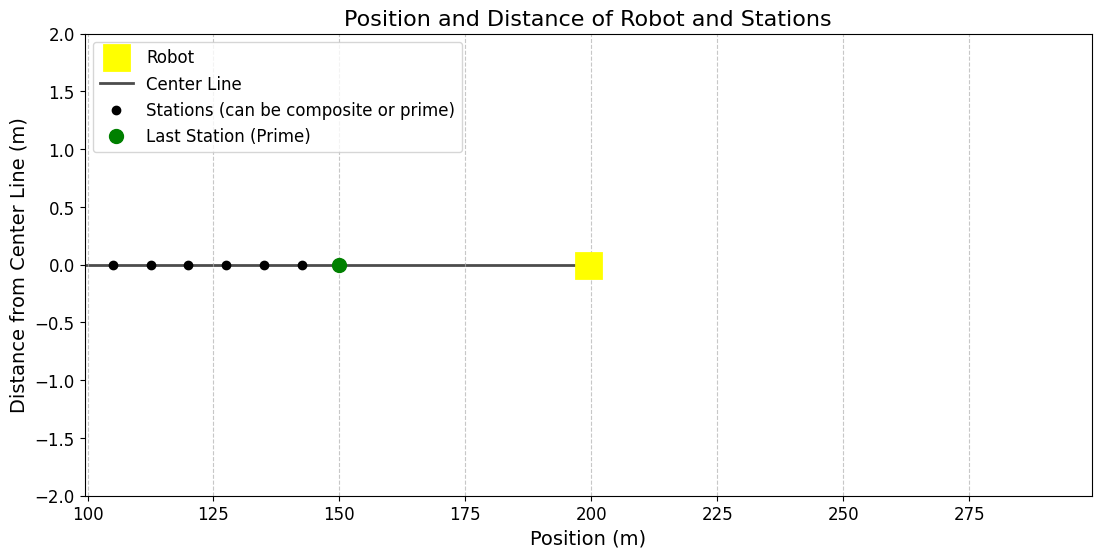

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(13, 6))
ax.set_xlim(-1, len(station_positions) + 1)
ax.set_ylim(-2, 2)
ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.7)

station_markers = ax.plot(station_positions, np.zeros_like(station_positions), 'o', color='black', markersize=6, label='Stations (can be composite or prime)', zorder=3)

last_station_marker, = ax.plot(station_positions[-1], 0, 'o', color='green', markersize=10, label='Last Station (Prime)', zorder=4)

rob_line, = ax.plot([], [], 's', color='yellow', label='Robot', markersize=18, markeredgewidth=2, zorder=2)
center_line, = ax.plot([], [], 'k', label='Center Line', alpha=0.7, linewidth=2, zorder=1)

ax.set_xlabel("Position (m)", fontsize=14)
ax.set_ylabel("Distance from Center Line (m)", fontsize=14)
ax.set_title("Position and Distance of Robot and Stations", fontsize=16)
ax.legend(handles=[rob_line, center_line, *station_markers, last_station_marker], loc='upper left', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Create animation
ani = FuncAnimation(fig, update, frames=len(time)//5, init_func=init, blit=True, interval=650)

# Display video in Jupyter notebook
HTML(ani.to_html5_video())
